

---



In [70]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress



---



In [71]:
Temperatures = [300, 325, 350, 375, 400]
Colors = ['black', 'blue', 'green', 'red', 'cyan']



---



In [72]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')



---



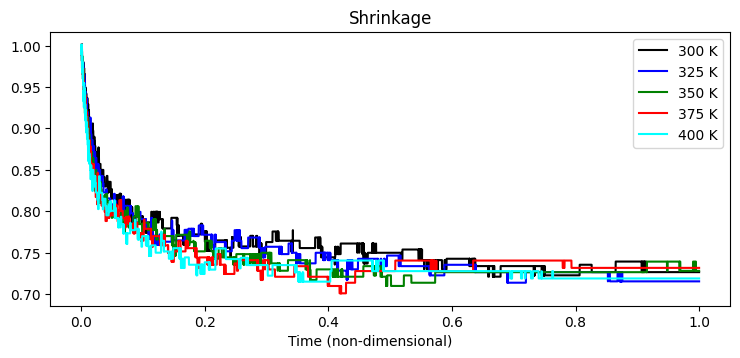

In [73]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')
fig, axs = plt.subplots(1, 1, figsize=(7.5, 3.5))
for T in Temperatures:
  x_values = data[T].iloc[:, 0]
  y_values = data[T].iloc[:, -1]
  axs.plot(x_values/x_values.max(), y_values, label=f'{T} K', color=Colors[Temperatures.index(T)])
axs.set_title('Shrinkage')
axs.legend()
fig.text(0.5, 0.01, 'Time (non-dimensional)', ha='center', va='center')
plt.tight_layout()
plt.show()



---



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


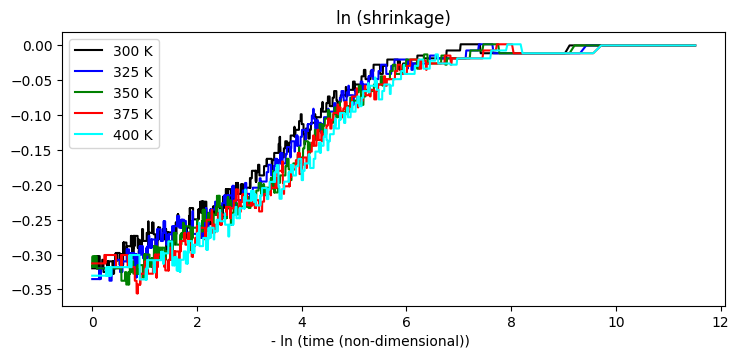

In [74]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')
fig, axs = plt.subplots(1, 1, figsize=(7.5, 3.5))
for T in Temperatures:
  x_values = data[T].iloc[:, 0]
  y_values = data[T].iloc[:, -1]
  axs.plot(-np.log(x_values/x_values.max()), np.log(y_values), label=f'{T} K', color=Colors[Temperatures.index(T)])
axs.set_title('ln (shrinkage)')
axs.legend()
fig.text(0.5, 0.01, '- ln (time (non-dimensional))', ha='center', va='center')
plt.tight_layout()
plt.show()



---



In [75]:
def gaussian(x, amplitude, mean, stddev):
  return amplitude * np.exp(-((x - mean) / stddev) ** 2 / 2)



---



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R-squared for 300 K: 0.9407173541038254
popt [-0.32382806 -0.80920662  3.62688755]
pcov [[ 4.24258050e-08  1.72565644e-06 -1.28253085e-06]
 [ 1.72565644e-06  7.56912569e-05 -5.94496176e-05]
 [-1.28253085e-06 -5.94496176e-05  5.03736748e-05]]


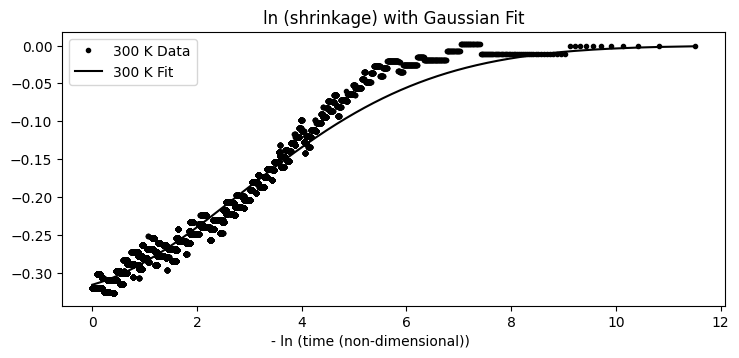

R-squared for 325 K: 0.9488611742963291
popt [-0.34681276 -1.20587012  3.9275739 ]
pcov [[ 8.14729032e-08  2.99483568e-06 -2.09134443e-06]
 [ 2.99483568e-06  1.15373902e-04 -8.39267322e-05]
 [-2.09134443e-06 -8.39267322e-05  6.45867113e-05]]


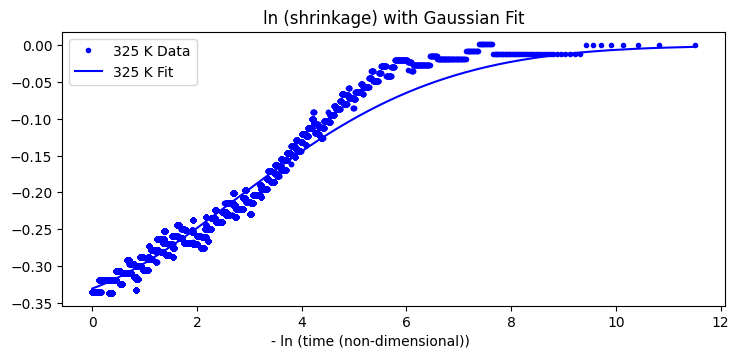

R-squared for 350 K: 0.9357389848575683
popt [-0.32002805  0.2596202   2.97854619]
pcov [[ 2.33849613e-09  7.99365787e-08 -5.66505446e-08]
 [ 7.99365787e-08  9.00941634e-06 -9.63106988e-06]
 [-5.66505446e-08 -9.63106988e-06  1.32947545e-05]]


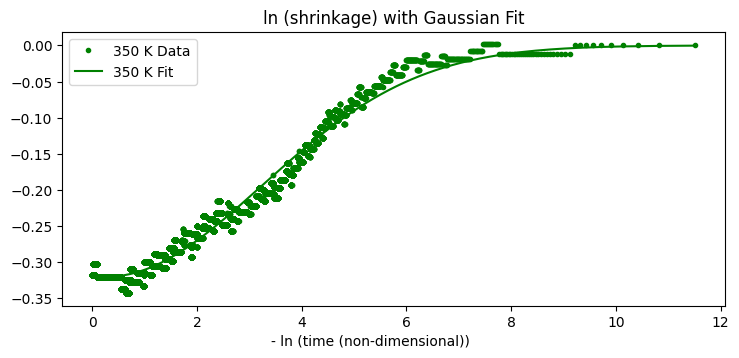

R-squared for 375 K: 0.9085471570018981
popt [-0.31558507  0.70345598  2.70769653]
pcov [[ 2.01035993e-09 -1.82286891e-08  5.58399317e-08]
 [-1.82286891e-08  3.73429691e-06 -4.35428745e-06]
 [ 5.58399317e-08 -4.35428745e-06  9.03851841e-06]]


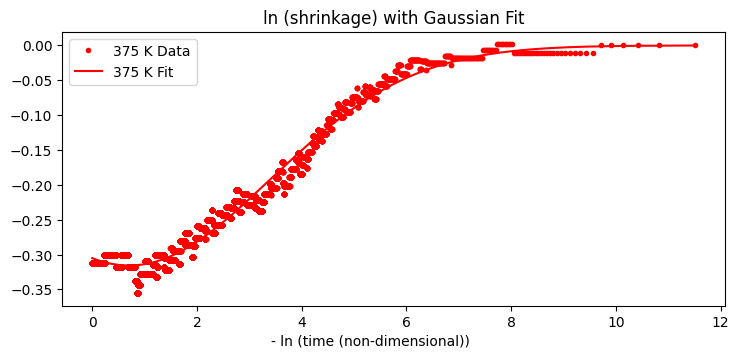

R-squared for 400 K: 0.9325748520228906
popt [-0.32502255  0.18275613  3.32999239]
pcov [[ 2.51967080e-09  1.14656755e-07 -9.37711482e-08]
 [ 1.14656755e-07  1.23165829e-05 -1.34389351e-05]
 [-9.37711482e-08 -1.34389351e-05  1.84392739e-05]]


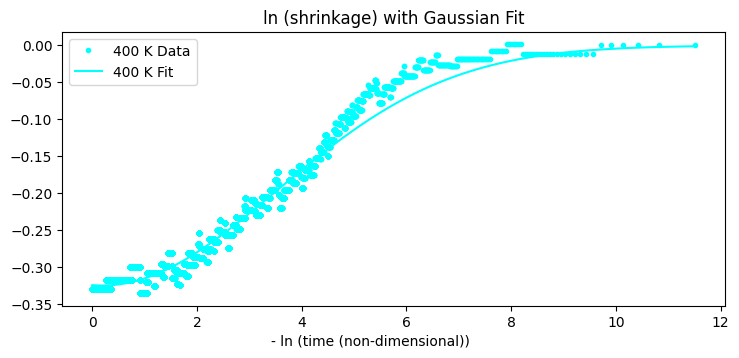

In [76]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')
for T in Temperatures:
  fig, axs = plt.subplots(1, 1, figsize=(7.5, 3.5))

  x_values = data[T].iloc[:, 0]
  y_values = data[T].iloc[:, -1]
  x_fit = -np.log(x_values / x_values.max())
  y_fit = np.log(y_values)

  popt, pcov = curve_fit(gaussian, x_fit, y_fit)

  axs.plot(x_fit, y_fit, '.', label=f'{T} K Data', color=Colors[Temperatures.index(T)])
  axs.plot(x_fit, gaussian(x_fit, *popt), '-', label=f'{T} K Fit', color=Colors[Temperatures.index(T)])

  residuals = y_fit - gaussian(x_fit, *popt)
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y_fit - np.mean(y_fit))**2)
  r_squared = 1 - (ss_res / ss_tot)
  print(f"R-squared for {T} K: {r_squared}")
  print('popt', popt)
  print('pcov', pcov)
  axs.set_title('ln (shrinkage) with Gaussian Fit')

  axs.legend()
  fig.text(0.5, 0.01, '- ln (time (non-dimensional))', ha='center', va='center')
  plt.tight_layout()
  plt.show()



---



/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


R-squared for 300 K: 0.9407173541038254
popt [-0.32382806 -0.80920662  3.62688755]
pcov [[ 4.24258050e-08  1.72565644e-06 -1.28253085e-06]
 [ 1.72565644e-06  7.56912569e-05 -5.94496176e-05]
 [-1.28253085e-06 -5.94496176e-05  5.03736748e-05]]
R-squared for 325 K: 0.9488611742963291
popt [-0.34681276 -1.20587012  3.9275739 ]
pcov [[ 8.14729032e-08  2.99483568e-06 -2.09134443e-06]
 [ 2.99483568e-06  1.15373902e-04 -8.39267322e-05]
 [-2.09134443e-06 -8.39267322e-05  6.45867113e-05]]
R-squared for 350 K: 0.9357389848575683
popt [-0.32002805  0.2596202   2.97854619]
pcov [[ 2.33849613e-09  7.99365787e-08 -5.66505446e-08]
 [ 7.99365787e-08  9.00941634e-06 -9.63106988e-06]
 [-5.66505446e-08 -9.63106988e-06  1.32947545e-05]]
R-squared for 375 K: 0.9085471570018981
popt [-0.31558507  0.70345598  2.70769653]
pcov [[ 2.01035993e-09 -1.82286891e-08  5.58399317e-08]
 [-1.82286891e-08  3.73429691e-06 -4.35428745e-06]
 [ 5.58399317e-08 -4.35428745e-06  9.03851841e-06]]
R-squared for 400 K: 0.932574852

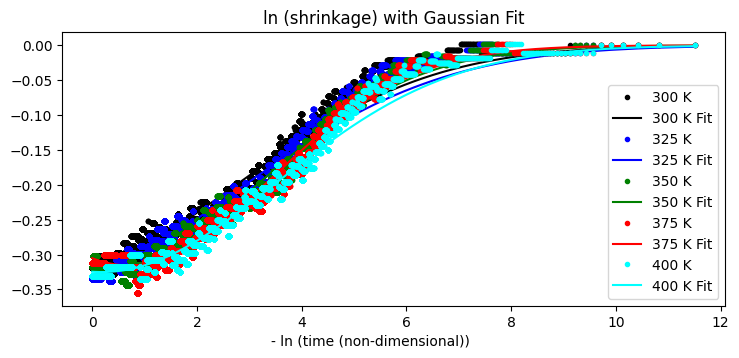

In [77]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')
fig, axs = plt.subplots(1, 1, figsize=(7.5, 3.5))
for T in Temperatures:
  x_values = data[T].iloc[:, 0]
  y_values = data[T].iloc[:, -1]
  x_fit = -np.log(x_values / x_values.max())
  y_fit = np.log(y_values)
  popt, pcov = curve_fit(gaussian, x_fit, y_fit)
  axs.plot(x_fit, y_fit, '.', label=f'{T} K', color=Colors[Temperatures.index(T)])
  axs.plot(x_fit, gaussian(x_fit, *popt), '-', label=f'{T} K Fit', color=Colors[Temperatures.index(T)])
  residuals = y_fit - gaussian(x_fit, *popt)
  ss_res = np.sum(residuals**2)
  ss_tot = np.sum((y_fit - np.mean(y_fit))**2)
  r_squared = 1 - (ss_res / ss_tot)
  print(f"R-squared for {T} K: {r_squared}")
  print('popt', popt)
  print('pcov', pcov)

axs.set_title('ln (shrinkage) with Gaussian Fit')
axs.legend()
fig.text(0.5, 0.01, '- ln (time (non-dimensional))', ha='center', va='center')
plt.tight_layout()
plt.show()



---



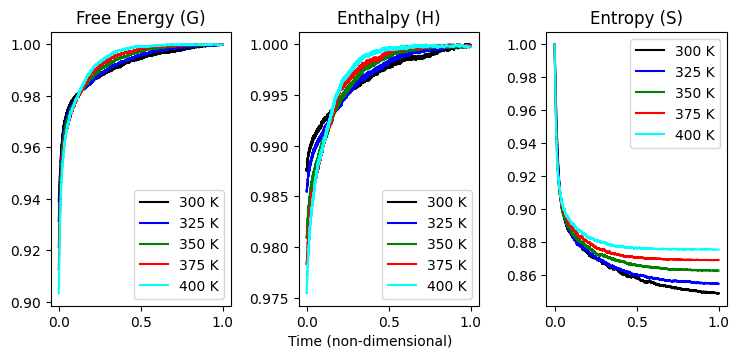

In [78]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')
fig, axs = plt.subplots(1, 3, figsize=(7.5, 3.5))
# G
for T in Temperatures:
  x_values = data[T].iloc[:, 0]
  y_values = data[T].iloc[:, -3]
  axs[0].plot(x_values / x_values.max(), y_values / y_values.max(), label=f'{T} K', color=Colors[Temperatures.index(T)])
axs[0].set_title('Free Energy (G)')# in kcal/mol - ZPVE included')
axs[0].legend()
# H
for T in Temperatures:
  x_values = data[T].iloc[:, 0]
  y_values = data[T].iloc[:, -4]
  axs[1].plot(x_values / x_values.max(), y_values / y_values.max(), label=f'{T} K', color=Colors[Temperatures.index(T)])
axs[1].set_title('Enthalpy (H)')# in kcal/mol - ZPVE included')
axs[1].legend()
# S
for T in Temperatures:
  x_values = data[T].iloc[:, 0]
  y_values = data[T].iloc[:, -6]
  axs[2].plot(x_values / x_values.max(), y_values / y_values.max(), label=f'{T} K', color=Colors[Temperatures.index(T)])
axs[2].set_title('Entropy (S)')# in kcal/mol - ZPVE included')
axs[2].legend()
#
fig.text(0.5, 0.01, 'Time (non-dimensional)', ha='center', va='center')
plt.tight_layout()
plt.show()



---



<ipython-input-79-96ec99763471>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(data[T].columns[3:-5]))
<ipython-input-79-96ec99763471>:22: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


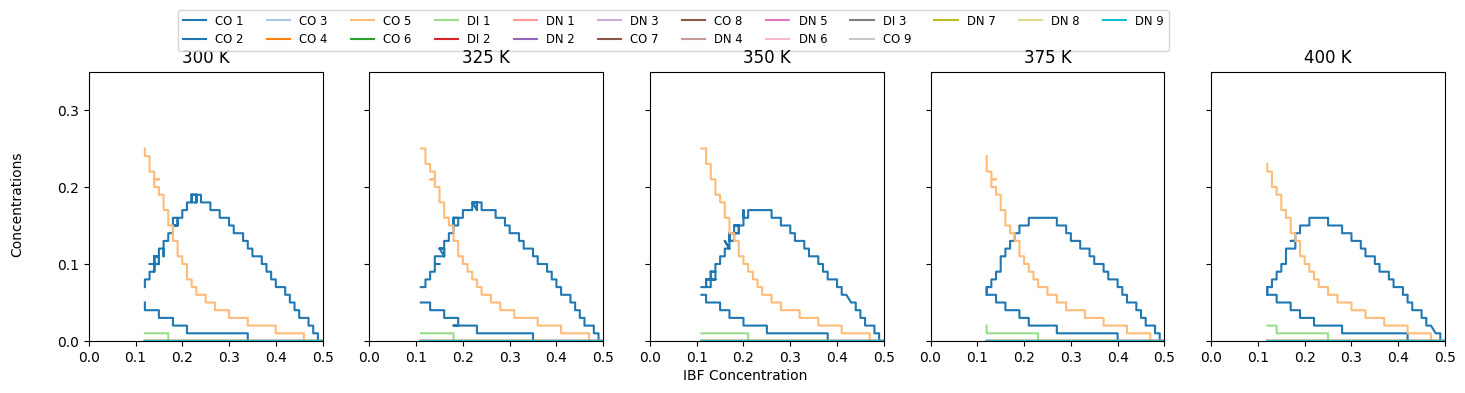

In [79]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')
fig, axs = plt.subplots(1, 5, figsize=(17.5, 3.5), sharey=True, sharex=True)
id = -1
color_palette = plt.cm.get_cmap('tab20', len(data[T].columns[3:-5]))
for T in Temperatures:
  id += 1
  for i, col in enumerate(range(3,data[T].shape[1]-7)):
    x_values = data[T].iloc[:, 1].values
    y_values = data[T].iloc[:, col].values
    axs[id].plot(x_values, y_values, label=data[T].columns[col], color=color_palette(i))
    axs[id].set_title(f'{T} K')
    axs[id].set_ylim([0, 0.35])
    axs[id].set_xlim([0, 0.5])
    axs[id].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))
    axs[id].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))
fig.text(0.5, 0.01, 'IBF Concentration', ha='center', va='center')
fig.text(0.08, 0.5, 'Concentrations', va='center', rotation='vertical')
n_cols = len(data[T].columns[3:-4])
axs[0].legend(loc='upper center', bbox_to_anchor=(2.5, 1.25), ncol=n_cols//2, fontsize='small')
plt.tight_layout()
plt.show()



---



<ipython-input-80-c733afa0e655>:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_palette = plt.cm.get_cmap('tab20', len(data[T].columns[3:-5]))
<ipython-input-80-c733afa0e655>:22: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


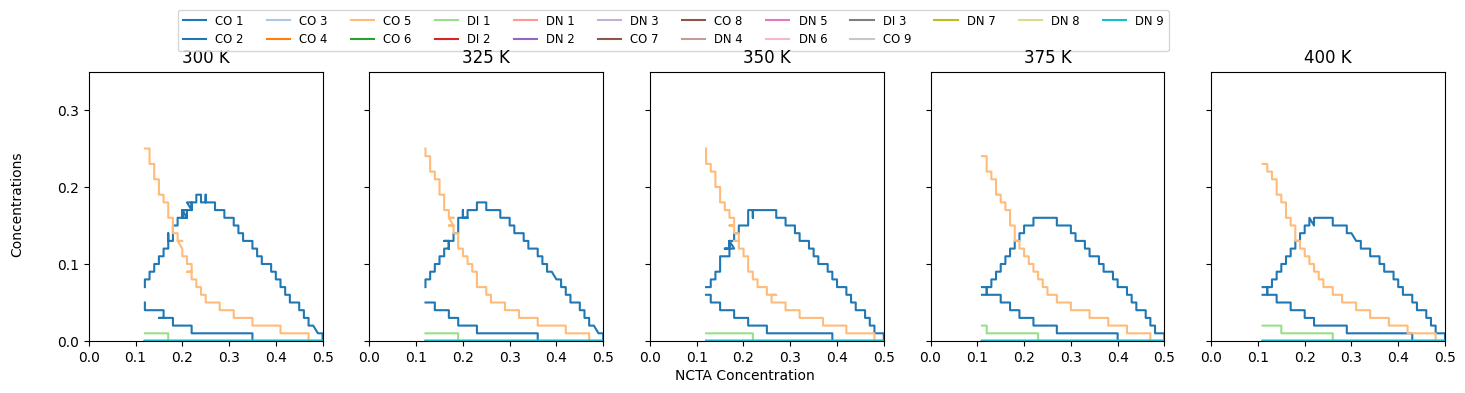

In [80]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')
fig, axs = plt.subplots(1, 5, figsize=(17.5, 3.5), sharey=True, sharex=True)
id = -1
color_palette = plt.cm.get_cmap('tab20', len(data[T].columns[3:-5]))
for T in Temperatures:
  id += 1
  for i, col in enumerate(range(3,data[T].shape[1]-7)):
    x_values = data[T].iloc[:, 2].values
    y_values = data[T].iloc[:, col].values
    axs[id].plot(x_values, y_values, label=data[T].columns[col], color=color_palette(i))
    axs[id].set_title(f'{T} K')
    axs[id].set_ylim([0, 0.35])
    axs[id].set_xlim([0, 0.5])
    axs[id].xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))
    axs[id].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(0.1))
fig.text(0.5, 0.01, 'NCTA Concentration', ha='center', va='center')
fig.text(0.08, 0.5, 'Concentrations', va='center', rotation='vertical')
n_cols = len(data[T].columns[3:-4])
axs[0].legend(loc='upper center', bbox_to_anchor=(2.5, 1.25), ncol=n_cols//2, fontsize='small')
plt.tight_layout()
plt.show()



---



slope1, intercept1, r_value1, p_value1, std_err1
-0.9725659137567394 0.4865449302883672 -0.9938607935800564 0.0 0.0003423727507631027
slope2, intercept2, r_value2, p_value2, std_err2
-0.9469961060907504 0.4868345639785243 -0.9945189980361943 0.0 0.00031483742267013315
slope1, intercept1, r_value1, p_value1, std_err1
-0.9495599635647618 0.48096477147542327 -0.9937098324049582 0.0 0.0003383974356836493
slope2, intercept2, r_value2, p_value2, std_err2
-0.9362045075646009 0.48377931578983335 -0.9940629300026591 0.0 0.0003240518724325931
slope1, intercept1, r_value1, p_value1, std_err1
-0.9800396482436552 0.4846051286322485 -0.9901357837045726 0.0 0.0004385546382505995
slope2, intercept2, r_value2, p_value2, std_err2
-0.9476233904071183 0.482922518198364 -0.9921860575680532 0.0 0.00037682948373859895
slope1, intercept1, r_value1, p_value1, std_err1
-0.9771457008907161 0.4825976202458443 -0.9902929827481839 0.0 0.00043370976667757294
slope2, intercept2, r_value2, p_value2, std_err2
-0.913388

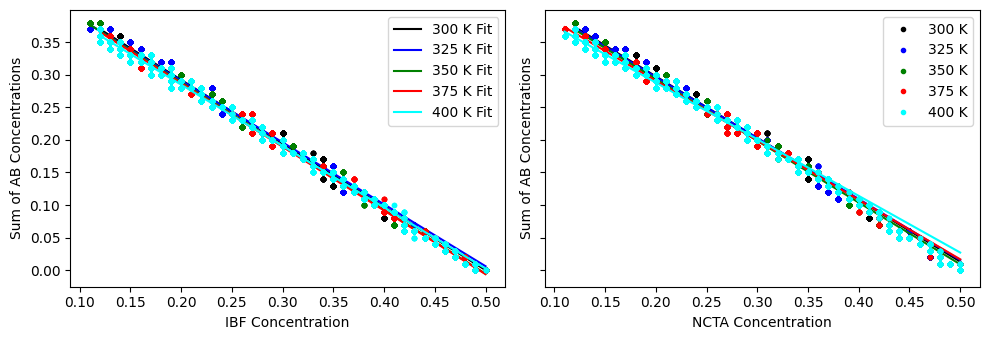

In [95]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')
fig, axs = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True, sharex=True)
for T in Temperatures:
  CO_columns = [col for col in data[T].columns if 'CO' in col]
  data[T]['CO_sum'] = data[T][CO_columns].sum(axis=1)
  axs[0].plot(data[T].iloc[:, 1], data[T]['CO_sum'], '.', color=Colors[Temperatures.index(T)])
  slope1, intercept1, r_value1, p_value1, std_err1 = linregress(data[T].iloc[:, 1], data[T]['CO_sum'])
  print('slope1, intercept1, r_value1, p_value1, std_err1')
  print(slope1, intercept1, r_value1, p_value1, std_err1)
  axs[0].plot(data[T].iloc[:, 1], slope1 * data[T].iloc[:, 1] + intercept1, '-', label=f'{T} K Fit', color=Colors[Temperatures.index(T)])
  axs[1].plot(data[T].iloc[:, 2], data[T]['CO_sum'], '.', label=f'{T} K', color=Colors[Temperatures.index(T)])
  slope2, intercept2, r_value2, p_value2, std_err2 = linregress(data[T].iloc[:, 2], data[T]['CO_sum'])
  print('slope2, intercept2, r_value2, p_value2, std_err2')
  print(slope2, intercept2, r_value2, p_value2, std_err2)
  axs[1].plot(data[T].iloc[:, 2], slope2 * data[T].iloc[:, 2] + intercept2, '-', color=Colors[Temperatures.index(T)])
axs[0].set_xlabel('IBF Concentration')
axs[0].set_ylabel('Sum of AB Concentrations')
axs[1].set_xlabel('NCTA Concentration')
axs[1].set_ylabel('Sum of AB Concentrations')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()



---



slope1, intercept1, r_value1, p_value1, std_err1
0.0 0.0 0.0 1.0 0.0
slope2, intercept2, r_value2, p_value2, std_err2
0.0 0.0 0.0 1.0 0.0
slope1, intercept1, r_value1, p_value1, std_err1
0.0 0.0 0.0 1.0 0.0
slope2, intercept2, r_value2, p_value2, std_err2
0.0 0.0 0.0 1.0 0.0
slope1, intercept1, r_value1, p_value1, std_err1
0.0 0.0 0.0 1.0 0.0
slope2, intercept2, r_value2, p_value2, std_err2
0.0 0.0 0.0 1.0 0.0
slope1, intercept1, r_value1, p_value1, std_err1
0.0 0.0 0.0 1.0 0.0
slope2, intercept2, r_value2, p_value2, std_err2
0.0 0.0 0.0 1.0 0.0
slope1, intercept1, r_value1, p_value1, std_err1
0.0 0.0 0.0 1.0 0.0
slope2, intercept2, r_value2, p_value2, std_err2
0.0 0.0 0.0 1.0 0.0


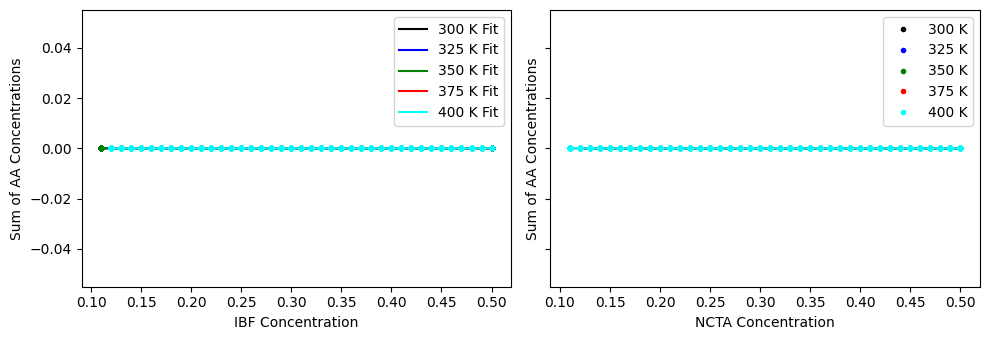

In [96]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')
fig, axs = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True, sharex=True)
for T in Temperatures:
  CO_columns = [col for col in data[T].columns if 'DN' in col]
  data[T]['CO_sum'] = data[T][CO_columns].sum(axis=1)
  axs[0].plot(data[T].iloc[:, 1], data[T]['CO_sum'], '.', color=Colors[Temperatures.index(T)])
  slope1, intercept1, r_value1, p_value1, std_err1 = linregress(data[T].iloc[:, 1], data[T]['CO_sum'])
  print('slope1, intercept1, r_value1, p_value1, std_err1')
  print(slope1, intercept1, r_value1, p_value1, std_err1)
  axs[0].plot(data[T].iloc[:, 1], slope1 * data[T].iloc[:, 1] + intercept1, '-', label=f'{T} K Fit', color=Colors[Temperatures.index(T)])
  axs[1].plot(data[T].iloc[:, 2], data[T]['CO_sum'], '.', label=f'{T} K', color=Colors[Temperatures.index(T)])
  slope2, intercept2, r_value2, p_value2, std_err2 = linregress(data[T].iloc[:, 2], data[T]['CO_sum'])
  print('slope2, intercept2, r_value2, p_value2, std_err2')
  print(slope2, intercept2, r_value2, p_value2, std_err2)
  axs[1].plot(data[T].iloc[:, 2], slope2 * data[T].iloc[:, 2] + intercept2, '-', color=Colors[Temperatures.index(T)])
axs[0].set_xlabel('IBF Concentration')
axs[0].set_ylabel('Sum of AA Concentrations')
axs[1].set_xlabel('NCTA Concentration')
axs[1].set_ylabel('Sum of AA Concentrations')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()



---



slope1, intercept1, r_value1, p_value1, std_err1
-0.0644943805775435 0.017307148136024776 -0.7416903711127647 0.0 0.00018444087751105605
slope2, intercept2, r_value2, p_value2, std_err2
-0.06343717944732827 0.01743123177857151 -0.7497267494168427 0.0 0.00017706607607766227
slope1, intercept1, r_value1, p_value1, std_err1
-0.05701398187848367 0.0167709928293706 -0.7767805063234839 0.0 0.0001461733419662147
slope2, intercept2, r_value2, p_value2, std_err2
-0.056518230830317415 0.01698720551684398 -0.781288555317865 0.0 0.00014278486036024346
slope1, intercept1, r_value1, p_value1, std_err1
-0.0434910976704917 0.015572072952155184 -0.788985353267078 0.0 0.0001071009424386142
slope2, intercept2, r_value2, p_value2, std_err2
-0.04163189597992039 0.015435290758438767 -0.782710210569466 0.0 0.00010468570869625913
slope1, intercept1, r_value1, p_value1, std_err1
-0.09424434595246818 0.02839320126324109 -0.7242942160231767 0.0 0.00028370767422046804
slope2, intercept2, r_value2, p_value2, std_e

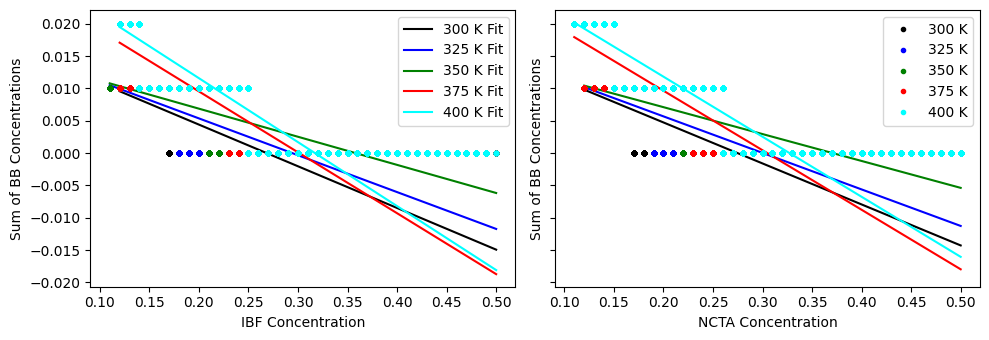

In [97]:
data = {}
for T in Temperatures:
  data[T] = pd.read_csv(f'2024_UL_phychmPBM_data_{T}K.csv')
fig, axs = plt.subplots(1, 2, figsize=(10, 3.5), sharey=True, sharex=True)
for T in Temperatures:
  CO_columns = [col for col in data[T].columns if 'DI' in col]
  data[T]['CO_sum'] = data[T][CO_columns].sum(axis=1)
  axs[0].plot(data[T].iloc[:, 1], data[T]['CO_sum'], '.', color=Colors[Temperatures.index(T)])
  slope1, intercept1, r_value1, p_value1, std_err1 = linregress(data[T].iloc[:, 1], data[T]['CO_sum'])
  print('slope1, intercept1, r_value1, p_value1, std_err1')
  print(slope1, intercept1, r_value1, p_value1, std_err1)
  axs[0].plot(data[T].iloc[:, 1], slope1 * data[T].iloc[:, 1] + intercept1, '-', label=f'{T} K Fit', color=Colors[Temperatures.index(T)])
  axs[1].plot(data[T].iloc[:, 2], data[T]['CO_sum'], '.', label=f'{T} K', color=Colors[Temperatures.index(T)])
  slope2, intercept2, r_value2, p_value2, std_err2 = linregress(data[T].iloc[:, 2], data[T]['CO_sum'])
  print('slope2, intercept2, r_value2, p_value2, std_err2')
  print(slope2, intercept2, r_value2, p_value2, std_err2)
  axs[1].plot(data[T].iloc[:, 2], slope2 * data[T].iloc[:, 2] + intercept2, '-', color=Colors[Temperatures.index(T)])
axs[0].set_xlabel('IBF Concentration')
axs[0].set_ylabel('Sum of BB Concentrations')
axs[1].set_xlabel('NCTA Concentration')
axs[1].set_ylabel('Sum of BB Concentrations')
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()



---

